4.155543462156206
0.5302223303784392
0.03934493301271913
20.109632428723106


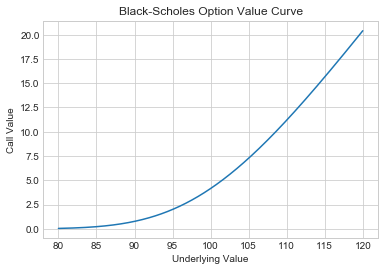

In [1]:
from QuantLib import *

today = Date(7, March, 2014)
Settings.instance().evaluationDate = today

option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(Date(7, June, 2014)))
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())
process = BlackScholesProcess(QuoteHandle(u), YieldTermStructureHandle(riskFreeCurve), BlackVolTermStructureHandle(volatility))

engine = AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)

print(option.NPV())
print(option.delta())
print(option.gamma())
print(option.vega())

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

plt.title("Black-Scholes Option Value Curve")
plt.xlabel("Underlying Value")
plt.ylabel("Call Value")
xs = np.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
	u.setValue(x)
	ys.append(option.NPV())
plt.plot(xs, ys)
plt.show()